In [103]:
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
pa = pd.read_csv("psam_p42.csv")

In [93]:
asn_pa = pa.query('AGEP>=18 and RACASN==1')
asn_pa.shape

(13891, 286)

In [7]:
asn_pa.groupby('RAC2P').count().head(1)

,RT,SERIALNO,DIVISION,SPORDER,PUMA,REGION,ST,ADJINC,PWGTP,AGEP,...,PWGTP71,PWGTP72,PWGTP73,PWGTP74,PWGTP75,PWGTP76,PWGTP77,PWGTP78,PWGTP79,PWGTP80
RAC2P,,,,,,,,,,,,,,,,,,,,,
38,3645,3645,3645,3645,3645,3645,3645,3645,3645,3645,...,3645,3645,3645,3645,3645,3645,3645,3645,3645,3645


In [67]:
# a 2D table, row = educational attainment, col = race by RAC2P (asian ethnicity)
asn_pa_ed = asn_pa.groupby(['RAC2P','SCHL']).size().unstack()
asn_pa_ed.fillna(0)

SCHL,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0
RAC2P,,,,,,,,,,,,,,,,,,,,,
38,53.0,0.0,0.0,0.0,2.0,2.0,4.0,8.0,12.0,8.0,...,79.0,351.0,40.0,158.0,317.0,119.0,1019.0,894.0,288.0,195.0
39,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,21.0,1.0,8.0,9.0,9.0,26.0,15.0,3.0,8.0
40,22.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,3.0,0.0,...,7.0,12.0,1.0,1.0,2.0,1.0,5.0,0.0,0.0,0.0
41,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,3.0,1.0,...,0.0,6.0,0.0,7.0,3.0,0.0,14.0,4.0,0.0,2.0
42,40.0,0.0,0.0,1.0,2.0,4.0,5.0,3.0,2.0,2.0,...,12.0,56.0,3.0,11.0,27.0,17.0,31.0,12.0,2.0,1.0
43,204.0,1.0,2.0,4.0,8.0,9.0,8.0,22.0,51.0,22.0,...,99.0,477.0,30.0,154.0,388.0,110.0,670.0,500.0,136.0,311.0
44,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,12.0,0.0,5.0,5.0,4.0,33.0,32.0,14.0,18.0
45,15.0,0.0,0.0,1.0,0.0,2.0,1.0,3.0,8.0,1.0,...,11.0,138.0,18.0,33.0,101.0,67.0,317.0,70.0,56.0,18.0
46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,2.0,3.0,1.0,0.0,0.0


In [101]:
all_pa_ed = asn_pa.groupby('SCHL').size()


SCHL,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0
0,591,2,5,9,21,35,38,67,126,56,...,398,2082,201,676,1614,611,3348,1978,722,723


(128717, 286)

In [149]:
def laplace_mech(mu, epsilon, sensitivity=1.0):
    """Implementation of the Laplace Mechanism that adds Laplacian-distributed noise to a function.
  　
    Args:
      mu (float or numpy array): the true answer
      epsilon(int): the privacy budget
      sensitivity (float): the global sensitivity of the query
    """
    eps = epsilon/float(sensitivity)
    scale = 1/eps
    np_shape = np.shape(mu)
    shape = None if np_shape == () else np_shape
    z = np.random.laplace(0.0, scale=scale, size=shape)
    return mu + z

def avg_l1_laplace(epsilon, mu, n=1000):
    """Takes the average error of the laplace mechanism on an array over n samples.
  　
    Args:
      epsilon (int): the privacy budget
      mu (float or numpy array): the true answer
      n (int): number of samples
    """
    total = 0
    for i in range(n):
        noisy_arr = laplace_mech(mu, epsilon, sensitivity=1.0)
        accuracy = 1 - (np.linalg.norm(noisy_arr-mu)/(2*noisy_arr.shape[1]))
        total += accuracy
    return total/n



    episolon  accuracy
0       0.10 -0.400627
1       0.15  0.051339
2       0.20  0.288863
3       0.25  0.439857
4       0.30  0.525106
5       0.35  0.600580
6       0.40  0.645891
7       0.45  0.687113
8       0.50  0.717812
9       0.55  0.744490
10      0.60  0.764265
11      0.65  0.785328
12      0.70  0.798909
13      0.75  0.814197
14      0.80  0.822775
15      0.85  0.836413
16      0.90  0.841603
17      0.95  0.851063
18      1.00  0.859778
19      1.05  0.867423
20      1.10  0.871037
21      1.15  0.877167
22      1.20  0.881727
23      1.25  0.885981
24      1.30  0.891987
25      1.35  0.894884
26      1.40  0.900137
27      1.45  0.902837
28      1.50  0.907499
29      1.55  0.909604
30      1.60  0.912594
31      1.65  0.914767
32      1.70  0.916786
33      1.75  0.918579
34      1.80  0.921162
35      1.85  0.923842
36      1.90  0.925728
37      1.95  0.927560
38      2.00  0.930457
39      2.05  0.931578
40      2.10  0.932565
41      2.15  0.934646
42      2.2

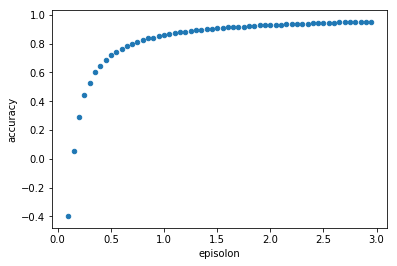

In [150]:
orig_arr = pd.DataFrame(all_pa_ed).T
accuracy_df = pd.DataFrame()
accuracy_df['episolon'] = list(np.arange(.1,3.0,.05))
accuracy_df['accuracy'] = [avg_l1_laplace(x, orig_arr) for x in list(np.arange(.1,3.0,.05))]
print (accuracy_df)
accuracy_df.plot.scatter('episolon', 'accuracy')
plt.show()

In [148]:
avg_l1_laplace(1, orig_arr, n=10)

24
24
24
24
24
24
24
24
24
24


-2.3877811724977938